In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/DataAnalysis/Python/DataScienceProject/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

#### Drop features that are not required to build our model

In [6]:
df.drop(columns = ['area_type','society','balcony','availability'], axis='columns', inplace=True)

In [7]:
df.head(20)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


#### Data Cleaning: Handle NA values

In [8]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
location      13319 non-null object
size          13304 non-null object
total_sqft    13320 non-null object
bath          13247 non-null float64
price         13320 non-null float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
df.shape

(13320, 5)

In [11]:
df.dropna(how='all', inplace = True)

In [12]:
df.shape

(13320, 5)

#### As shape remains the same, which means, there is no row in the dataset in which all the values are NA for all the columns 

#### Now, let me replace null values in bathroom column with median values

In [13]:
median = df['bath'].median()
median

2.0

In [14]:
df['bath'].fillna(median, inplace = True)

In [15]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [16]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
27 BHK           1
43 Bedroom       1
18 Bedroom       1
13 BHK           1
16 BHK           1
12 Bedroom       1
19 BHK           1
14 BHK           1
Name: size, dtype: int64

In [17]:
df.dropna(inplace = True)

In [18]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df.shape

(13303, 5)

### Handling feature 'Size'

#### As can be seen in the size feature, we have discrepancy values like 2BHK, 4 Bedroom. Normalizing them to create uniform values by creating new feature "BHK" which will have values as 1,2,3 and so on 

In [20]:
df['bhk'] = df['size'].apply(lambda x: x.split(' ')[0])
# Split - Splits the values in df['size'] where ever it find a space and create token accordingly, ex. 2 BKH, it has 
# only one space in between 2 and BHK, so split will create two tokens "2" and "BHK", and we want the first token i.e "2", 
# So we have used [0] for the same

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
location      13303 non-null object
size          13303 non-null object
total_sqft    13303 non-null object
bath          13303 non-null float64
price         13303 non-null float64
bhk           13303 non-null object
dtypes: float64(2), object(4)
memory usage: 727.5+ KB


In [22]:
# Converting bhk feature which is object to integer datatype
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
location      13303 non-null object
size          13303 non-null object
total_sqft    13303 non-null object
bath          13303 non-null float64
price         13303 non-null float64
bhk           13303 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 727.5+ KB


In [24]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

#### Now clearly, we cannot have 43 or 27 BHK's for a house, but before dealing with this or removing these, we need to first explore and investigate total_sqft of the house, because depending on total_sqft of the house, we can have respective BHK's, more total_sqft, more BHK's and vice versa

### Handling feature 'total_sqft'

In [27]:
from collections import Counter
Counter(df['total_sqft'])

Counter({'1056': 12,
         '2600': 24,
         '1440': 23,
         '1521': 4,
         '1200': 843,
         '1170': 40,
         '2732': 3,
         '3300': 16,
         '1310': 37,
         '1020': 63,
         '1800': 104,
         '2785': 1,
         '1000': 172,
         '1100': 221,
         '2250': 13,
         '1175': 48,
         '1180': 58,
         '1540': 20,
         '2770': 3,
         '600': 180,
         '1755': 6,
         '2800': 28,
         '1767': 4,
         '510': 5,
         '1250': 114,
         '660': 20,
         '1610': 21,
         '1151': 12,
         '1025': 38,
         '2100 - 2850': 1,
         '1075': 66,
         '1760': 25,
         '1693': 9,
         '1925': 5,
         '700': 52,
         '1070': 53,
         '1724': 9,
         '1290': 37,
         '1143': 7,
         '1296': 12,
         '1254': 7,
         '1330.74': 1,
         '970': 13,
         '1459': 4,
         '800': 67,
         '869': 1,
         '1270': 41,
         '1670': 8,


In [28]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Now, let me check all the variations that I have in the total_sqft column, so for doing that, I will create a function to see if the value is float or not

In [29]:
# Creating a function that will convert every valid values to float ex. 1056, 
#but if an unvalid value like 1133 - 1384 is fed, then it should not convert it into float and instead return false
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [30]:
df[df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


#### Now, I want to see only those values that are not float or are not valid like 1133 - 1384 or 34.46Sq. Meter , I will use the negate on the above code

In [31]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


#### I can see, at index 410, I have these "34.46Sq. Meter" kind of variations too along with ''2100 - 2850'' at index 30, lets handle both of them, for these range values 2100-2850, I can take the average of them, and for  34.46Sq. Meter, I can convert their unit to square feet, but for now I will ignore them

#### Below is a python function which takes input (data values of feature 'total_sqft') like float values (ex. 1056), range values (ex. 2100 - 2850) and other variations (ex. 34.46Sq. Meter). Converts these inputs to float values, average i.e (2100+2850)/2 and None respectively

In [35]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1]))/2) # for range values like 3010 - 3410, perform the average
    try: # for normal values like 1056, convert them to float
        return float(x) 
    except: # for all other values which includes 34.46Sq. Meter, ignore them
        return None

In [36]:
convert_sqft_to_num('1056')

1056.0

In [37]:
convert_sqft_to_num('3010 - 3410')

3210.0

In [38]:
convert_sqft_to_num('34.46Sq. Meter') #No Output

In [39]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [40]:
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [41]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [42]:
df.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

#### Now, we have deal with price and total_sqft, for this lets find out price_per_square_feet, by dividing the price with total_sqft and multiplying the result with1Lakh, as the price is in Lakhs

In [43]:
df['price_per_sqft'] = (df['price']/df['total_sqft']) * 100000

In [44]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Now, lets explore "location" column

In [45]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [46]:
len(df['location'].unique())

1304

#### Now, location is a text categorical variable, and we can't use dummy variable as the number of categories are very high, this is called the high dimensionality problem. There are techniques available to reduce dimensions, one of the effective technqiue is to come up with 'other' category, other category means when we have many categories like 1304 location, there will be many locations which will be having one or two data points. So, we will find those particular locations and put them in "other" category. Lets first find those locations.

In [47]:
# How many data points are available per location?
# We will use strip() just to delete any leading or trailing space

df['location'] = df['location'].apply(lambda x : x.strip())

In [48]:
location_stats = df['location'].value_counts()
location_stats

Whitefield              540
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          273
Thanisandra             237
                       ... 
Gangondanahalli           1
Gollarahatti              1
Off Bannergatta road      1
Whietfield,               1
T K Reddy Layout          1
Name: location, Length: 1293, dtype: int64

In [49]:
location_stats.head()

Whitefield         540
Sarjapur  Road     397
Electronic City    304
Kanakpura Road     273
Thanisandra        237
Name: location, dtype: int64

In [50]:
location_stats.tail(20)

Banashankari 2nd Stage               1
2Electronic City Phase II            1
T G extension                        1
Air View Colony                      1
Arasanakunte                         1
Beml layout, Rajarajeshwari nagar    1
BEML Layout 5th stage                1
Narasapura                           1
Chellikere                           1
KG Halli                             1
Govindraja Nagar                     1
Tippenahalli                         1
Rahat Bagh                           1
Halanayakanahalli                    1
basaveshwarnagar                     1
Gangondanahalli                      1
Gollarahatti                         1
Off Bannergatta road                 1
Whietfield,                          1
T K Reddy Layout                     1
Name: location, dtype: int64

### Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [51]:
len(location_stats)

1293

In [52]:
len(location_stats[location_stats > 10])

241

In [53]:
len(location_stats[location_stats <= 10])

1052

In [54]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Sector 1 HSR Layout     10
Dodsworth Layout        10
Ganga Nagar             10
Basapura                10
Gunjur Palya            10
                        ..
Gangondanahalli          1
Gollarahatti             1
Off Bannergatta road     1
Whietfield,              1
T K Reddy Layout         1
Name: location, Length: 1052, dtype: int64

#### So I can put all these locations with less than 10 data points in one category 'other'

In [55]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [56]:
len(df['location'].unique())

242

#### So, we did reduced the location from 1304 to 242, now when I do one hot encoding, I will have 242 columns rather than 1304

In [57]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally the square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bedroom to be 300 sqft

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
location          13303 non-null object
size              13303 non-null object
total_sqft        13257 non-null float64
bath              13303 non-null float64
price             13303 non-null float64
bhk               13303 non-null int64
price_per_sqft    13257 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ MB


In [59]:
df[df['total_sqft']/df['bhk'] <300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


#### As can be seen, all the above are not acceptable, for ex at index 9, the sq_ft per bedroom is 1020/6 = 170 which is way less than the acceptable standard of 300

In [60]:
df.shape

(13303, 7)

In [61]:
df = df[~(df['total_sqft']/df['bhk'] < 300)]

In [62]:
df.shape

(12559, 7)

### Outlier Removal Using Standard Deviation and Mean

In [63]:
df['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

#### For normal distribution of data, we will keep price values which are near to mean and std. Outliers are all above mean+standard_deviation and below mean+standard_deviation.

In [64]:
# Function to remove outliers from price_per_sqft based on locations.
# As every location will have different price range
#for key, subdf in df.groupby('location'):
    #print(key)
    #print(subdf)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # 'key' variable stores cities and 'subdf' stores rows for each city
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        # data without outliers: 
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [65]:
df = remove_pps_outliers(df)
df.shape

(10286, 7)

#### If the sqft area of 2BHK is more than sqft area of 3BHK, then the price of 2BHK being more than 3BHK is justifiable. But, in some cases, the price of 2BHK houses are more than 3BHK houses even with the same sqft area or less, this could be because of many reasons like the 2BHK house can be in some prime location and thats the reason it might be costly. We will investigate by scatter plot of location VS price VS BHK

#### Let's check for a given location how does the 2 BHK and 3 BHK property prices look like

In [66]:
def scatter_df_location(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.figure(figsize = (15,8))
    plt.scatter(bhk2['total_sqft'], bhk2['price'],color = 'blue', label = '2BHK',)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+',color = 'red', label = '3BHK')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (Lakhs in Indian Rupees)')
    plt.title(location)
    plt.legend()

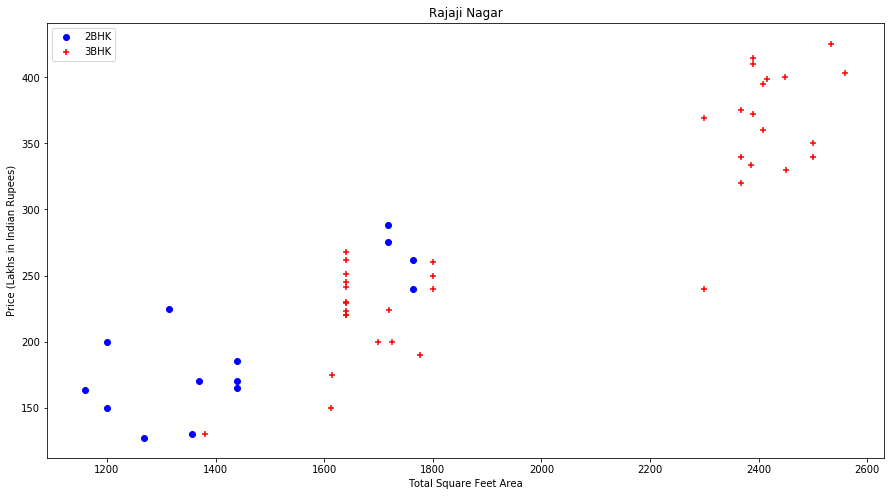

In [67]:
scatter_df_location(df, 'Rajaji Nagar' )

#### As can be seen, the price for 2BHK houses are more than 3BHK houses for the same location (Rajai Nagar) and for the same sqft (at 1700 and 1400) 

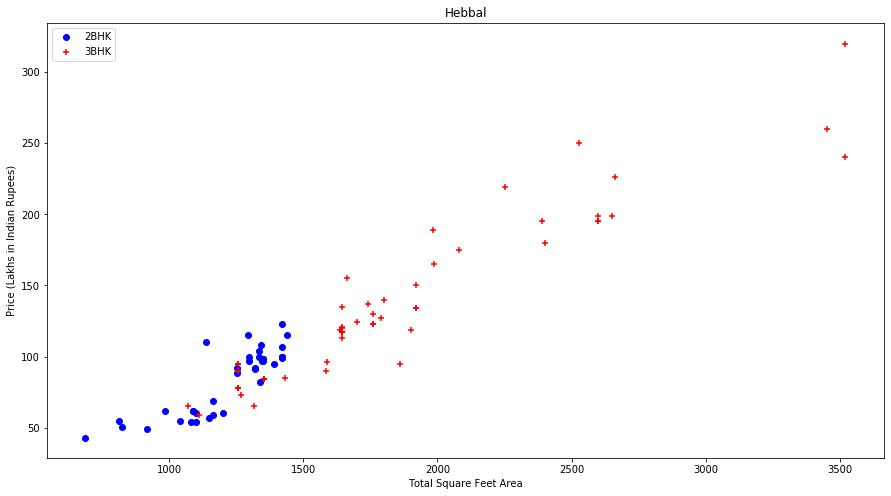

In [68]:
scatter_df_location(df, 'Hebbal' )

#### The price for 2BHK houses are more than 3BHK houses for the same location (Hebbal) and for the same sqft (between 1000 and 1500) 

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
        
    },
    
    '2' : {
    
        'mean': 4300,
        'std: 2300,
        'count': 22
        
    },    
}

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0] #shape would have given RowsXColumns, we want only number of rows, so shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [70]:
df.shape

(10286, 7)

In [71]:
df = remove_bhk_outliers(df)
df.shape

(7353, 7)

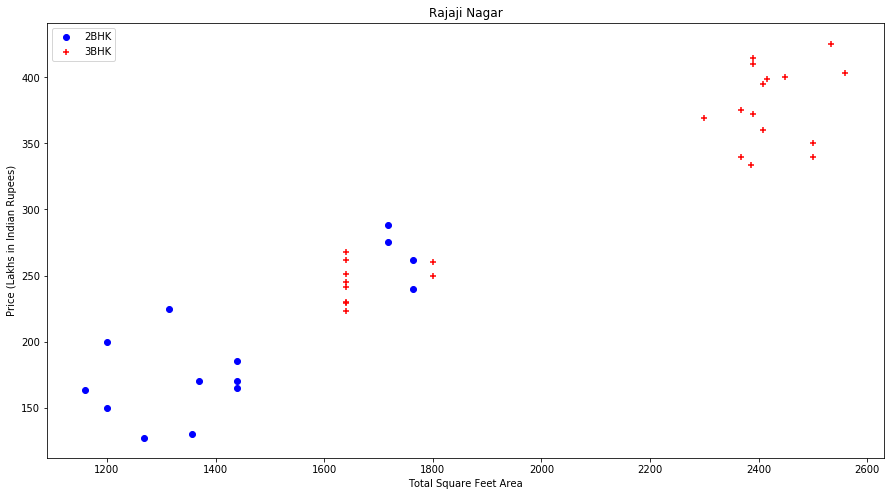

In [72]:
scatter_df_location(df, 'Rajaji Nagar' )

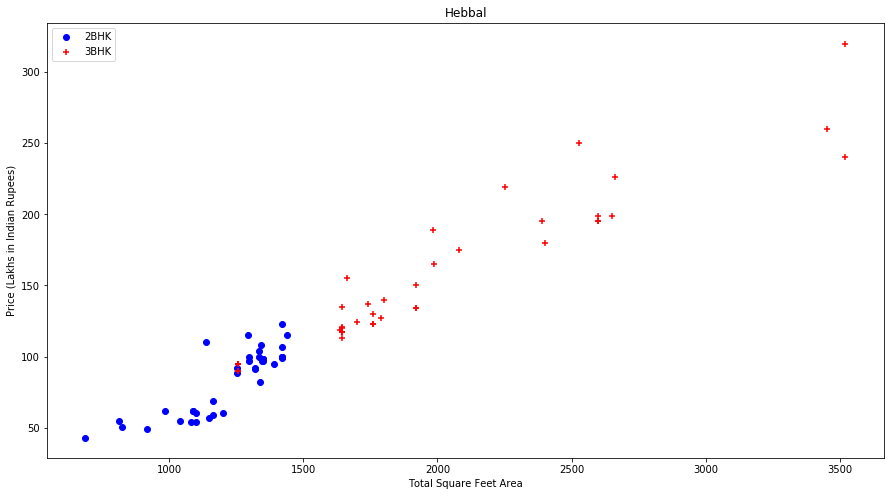

In [73]:
scatter_df_location(df, 'Hebbal' )

#### Now, lets explore the 'bathroom' feature

In [74]:
df['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [75]:
df[['bhk','bath']]

,bhk,bath
0,4,4.0
1,3,3.0
2,3,2.0
3,3,2.0
4,2,2.0
...,...,...
10277,2,2.0
10278,1,1.0
10281,2,2.0
10282,1,1.0


Text(0.5, 1.0, 'bhk VS bath')

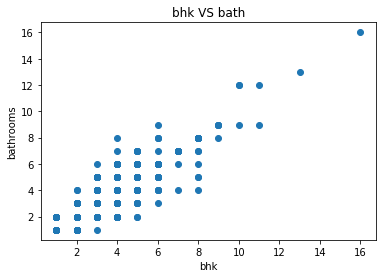

In [76]:
# Scatter plot BHK VS Bath
plt.scatter(data = df, x = 'bhk' , y = 'bath')
plt.xlabel('bhk')
plt.ylabel('bathrooms')
plt.title('bhk VS bath')

#### It can be seen from scatter plot, that we have more bathrooms than number of bedrooms in a house, for example for 4 BHK, we have like 6,7 and 8 bathrooms which doesn't look right
#### It is unusual to have 2 more bathrooms than number of bedrooms in a home.
####  if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed. So, we remove data points with 'bath' > 'bhk' + 2

In [77]:
df[(df['bath']) > (df['bhk']+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [78]:
df.shape

(7353, 7)

In [79]:
df = df[df['bath'] < df['bhk']+2]
df.shape

(7275, 7)

#### Now, lets get rid of unnecessary features like size and price_per_sqft as to represent size in uniform way, we already have bhk feature and we created price_per_sqft only to detect outliers and has no further use 

In [80]:
df.drop(columns = ['size', 'price_per_sqft'], axis = 'columns', inplace = True)
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Use One Hot Encoding For Location

In [81]:
dummies = pd.get_dummies(df['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# To avoid dummy trap variable trap, lets drop any one of the column i.e lets drop the 'other' column
df = pd.concat([df, dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df = df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating target and features columns

In [84]:
target = df['price']
features =  df.drop(columns = ['price'], axis = 'columns')

In [85]:
features.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
features.shape

(7275, 244)

In [87]:
target.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [88]:
target.shape

(7275,)

## Linear Regression

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [90]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.85779926241308

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [92]:
# Creating a ShuffleSplit for my cross validation
# ShuffleSplit will randomize my sample so that each of the fold have equal distribution of my data samples
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), features, target, cv = cv)

array([0.80702643, 0.77249195, 0.86466289, 0.83528873, 0.81806721])

#### We can see that in 5 iterations we get a score above 80% for majority of the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [93]:
from sklearn.model_selection import GridSearchCV

In [104]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


model_params = {    
                    
                    #linearRegression
                    'linear_regression': {
                         'model': LinearRegression(),
                         'params': {
                             
                                    'normalize': [True, False]
                            }
                    },
    
                        
                    #decision_tree
                    'decision_tree' : {
                        'model': DecisionTreeRegressor(),
                        'params': {
                            'max_depth':[1,5,10,20,50,100,200],
                            'criterion':['mse','friedman_mse'],
                            'splitter': ['best','random']
                        }
                    },
    
    
                    #Lasso
                    'lasso': {
                        'model': Lasso(),
                        'params': {
                                    #'max_iter': [1,5,10,20,50],
                                    'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.05, 0.5, 1,2],
                                    'selection': ['random', 'cyclic'],
                                    'normalize':[True, False]
                            }
                    },
                    
                        
                    #Ridge
                    'ridge': {
                        'model': Ridge(),
                        'params': {
                                    #'max_iter': [1, 5, 10,20,50],
                                    'alpha': [0.05, 0.1, 0.5, 1, 5, 10, 200, 230, 250,265, 270, 275, 290, 300,500],
                                    'normalize':[True, False]
                        }
                    },
    
                    
                            
                }

In [105]:
scores=[]

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    GS_CV = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score = False)
    GS_CV.fit(features,target)
    scores.append({
        'model': model_name,
        'best_score': GS_CV.best_score_,
        'best_params': GS_CV.best_params_
    })
    

df_GS_CV = pd.DataFrame(scores)
df_GS_CV

,model,best_score,best_params
0,linear_regression,0.819507,{'normalize': False}
1,decision_tree,0.774973,"{'criterion': 'friedman_mse', 'max_depth': 20,..."
2,lasso,0.807705,"{'alpha': 0.02, 'normalize': False, 'selection..."
3,ridge,0.821288,"{'alpha': 0.5, 'normalize': False}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use the model we trained for Linear Regression

### Predicting the price

In [106]:
features.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
features.shape

(7275, 244)

In [108]:
target.shape

(7275,)

In [109]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(features.columns==location)[0][0]

    x = np.zeros(len(features.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [110]:
# For demonstration, how the above function works, the above function just gives the index location of any location
features.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [111]:
np.where(features.columns=='2nd Phase Judicial Layout')[0][0]

5

#### So, if we see, the index location for the column '2nd Phase Judicial Layout' is 5

In [112]:
predict_price('1st Phase JP Nagar',1000, 2, 2) #95 Lakhs INR

95.21952991265485

In [113]:
predict_price('1st Phase JP Nagar',1000, 3, 3) #98 Lakhs INR

98.58155781537339

In [114]:
predict_price('Indira Nagar',1000, 2, 2) #176 Lakhs or 1 crore 76 lakhs

176.92479119372518

In [115]:
predict_price('Indira Nagar',1000, 3, 3) # 180 lakhs or 1 crore 80 lakhs

180.2868190964437

### Export the tested model to a pickle file

In [116]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [117]:
features.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

### Export above features column information to a file that will be useful later on in our prediction application

In [118]:
import json

columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))